In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


# **一.准备工作**
## 1.1导入相关库

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.2读取数据

In [3]:
data_train = pd.read_csv("../input/GiveMeSomeCredit/cs-training.csv")
data_test = pd.read_csv("../input/GiveMeSomeCredit/cs-test.csv")
#看看数据读取是否成功
data_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 1.3 对照dictionary 简单了解一下数据的含义
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  SeriousDlqin2yrs:是否有超过90天或更严重的贷款拖欠问题
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  RevolvingUtilizationOfUnsecuredLines：除去房贷车贷的贷款金额/信用卡总贷款额度
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  age：借款人的年龄
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  NumberOfTime30-59DaysPastDueNotWorse:过去两年内借款人发生30-59天的贷款拖欠问题的次数
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  DebtRatio：负债率（生活花费/总收入）
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  MonthlyIncome:月收入
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  NumberOfOpenCreditLinesAndLoans：总共贷过多少款（例如有几个车贷房贷/有几张信用卡）
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  NumberOfTime60-89DaysPastDueNotWorse:过去两年内借款人发生60-89天的贷款拖欠问题的次数
####       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  NumberOfDependents:家属人数（除去自己）

## 1.4查看描述性统计信息 准备对数据进行预处理

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
data_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# **二.数据预处理**

第一列应该是序号（ID），原数据集中的标题是Unnameed，改一下看着舒服点

In [6]:
data_train = data_train.rename(columns={"Unnamed: 0":"ID"})
data_test = data_test.rename(columns={"Unnamed: 0":"ID"})
data_train.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


对要预测的变量SeriousDlqin2yrs先作一个简单的观察

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

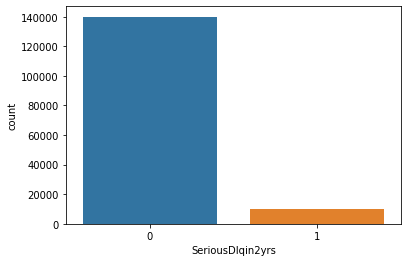

In [7]:
# 对分类结果SeriousDlqin2yrs查看
sns.countplot(x="SeriousDlqin2yrs",data=data_train)

发现数据是极度不平衡的，所以在最后使用随机森林时要注意设置**class_weight**参数来解决数据不平衡的问题

## 2.1缺失值处理

缺失值的处理方法一般包括：

- 直接使用含有缺失值的属性（不处理）；
- 删除含有缺失值的属性；
- 删除含有缺失值的样本；
- 缺失值补全：均值插补、建模预测，中位数填充等 

根据1.4中的描述性统计，训练集和测试集在NumberOfDependents和MonthlyIncome上有空缺值；

下面分别进行分析

In [8]:
data_train.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### 2.1.1 MonthlyIncome
从上表中可以发现MonthlyIncome缺失值较多（29731/150000$\approx$19.8%）  
所以不能直接删除含有缺失值的样本，考虑填充缺失值。  
因为随机森林不容易过拟合且对于有大量缺失值的数据能进行有效的估计与处理，所以此处我们使用随机森林进行回归预测，

In [9]:
from sklearn.ensemble import RandomForestRegressor

#先把所有数值特征提取出来 其中第零列是id不要,最后一列还有缺失值未处理先不要
data_randomforest = data_train.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

##把整个数据按MonthlyIncome是否为空缺分为两部分
known = data_randomforest[data_randomforest.MonthlyIncome.notnull()].values
unknown = data_randomforest[data_randomforest.MonthlyIncome.isnull()].values

##确定随机森林的训练集和试验集
#注意因为known的定义里就没取第零列，所以这里对应的列数都要减一
X_know = known[:,[0,1,2,3,4,6,7,8,9]]
Y_know = known[:,[5]]
X_forpredict = unknown[:,[0,1,2,3,4,6,7,8,9]]
##训练随机森林模型
rfr = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
rfr.fit(X_know,Y_know)

##预测缺失值,原数据中收入都是整数，所以这里保留0位小数
Y_predicted = rfr.predict(X_forpredict).round(0)

##回填
data_train.loc[(data_train.MonthlyIncome.isnull()), 'MonthlyIncome'] = Y_predicted

##看一下有没有成功
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

对训练集也做类似填充，只需注意训练集中SeriousDlqin2yrs也是空缺值，所以随机森林中传入的变量要少一个

In [10]:
#先把所有数值特征提取出来 其中第零列是id不要,最后一列还有缺失值未处理先不要
data_randomforest = data_test.iloc[:,[2,3,4,5,6,7,8,9,10]]

##把整个数据按MonthlyIncome是否为空缺分为两部分
known = data_randomforest[data_randomforest.MonthlyIncome.notnull()].values
unknown = data_randomforest[data_randomforest.MonthlyIncome.isnull()].values

##确定随机森林的训练集和试验集
#注意因为known的定义里没取第零和第一列，所以这里对应的列数都要减二
X_know = known[:,[0,1,2,3,5,6,7,8]]
Y_know = known[:,[4]]
X_forpredict = unknown[:,[0,1,2,3,5,6,7,8]]
##训练随机森林模型
rfr = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
rfr.fit(X_know,Y_know)

##预测缺失值,原数据中收入都是整数，所以这里保留0位小数
Y_predicted = rfr.predict(X_forpredict).round(0)

##回填
data_test.loc[(data_test.MonthlyIncome.isnull()), 'MonthlyIncome'] = Y_predicted

##看一下有没有成功
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         101503 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

### 2.1.2 NumberOfDependents
从上表中可以发现NumberOfDependents缺失值较少（3924/150000$\approx$2.6%）  
所以考虑直接使用fillna函数，用中位数填充缺失值。

In [11]:
data_train['NumberOfDependents'].fillna(data_train['NumberOfDependents'].median(), inplace=True)
data_test['NumberOfDependents'].fillna(data_test['NumberOfDependents'].median(), inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         101503 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## 2.2重复值处理
直接删除重复值即可

In [12]:
data_train = data_train.drop_duplicates()
data_train.info()
#事实上好像没有重复值咕噜咕噜

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## 2.3异常值处理

异常值的处理方法一般包括：

- 删除含有异常值的样本
- 将异常值视为缺失值，应用缺失值处理方法
- 用平均值来修正
- 不处理

先做一个分位数统计

In [13]:
data_train.select_dtypes('int64').describe().transpose()[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,37500.75,75000.5,112500.25,150000.0
SeriousDlqin2yrs,0.0,0.00,0.0,0.00,1.0
age,0.0,41.00,52.0,63.00,109.0
NumberOfTime30-59DaysPastDueNotWorse,0.0,0.00,0.0,0.00,98.0
NumberOfOpenCreditLinesAndLoans,0.0,5.00,8.0,11.00,58.0
NumberOfTimes90DaysLate,0.0,0.00,0.0,0.00,98.0
NumberRealEstateLoansOrLines,0.0,0.00,1.0,2.00,54.0
NumberOfTime60-89DaysPastDueNotWorse,0.0,0.00,0.0,0.00,98.0


发现其中不少特征的最大最小值都比较异常，需要进一步处理

先定义两个作图的函数，方便后续观察分析

In [14]:
from sklearn.feature_selection import mutual_info_classif
def plot_distributions_discrete(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(data_train[feature], kde=True, label='Train',stat='density',
                 discrete=True, color='steelblue', alpha=0.6, ax=axes[0])
    sns.histplot(data_test[feature], kde=True, label='Test',stat='density',
                 discrete=True, color='gold', alpha=0.25, ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')

    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=data_train, ax=axes[1], palette=['seagreen', 'tan'])
    
    X = data_train[[feature]].dropna()
    MI = mutual_info_classif(X, data_train.loc[X.index, 'SeriousDlqin2yrs'], discrete_features=True,
                             random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))

    plt.suptitle('"{}" distributions'.format(feature), y=1.15);

In [15]:
def plot_distributions_continuous(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.kdeplot(data_train[feature].apply(np.log1p), label='Train',
                color='steelblue', alpha=0.5, shade=True, edgecolor='k', ax=axes[0])
    sns.kdeplot(data_test[feature].apply(np.log1p), label='Test',
                color='gold', alpha=0.3, shade=True, edgecolor='k', ax=axes[0])

    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')
    axes[0].set_xlabel('log-{}'.format(feature))

    sns.boxplot(x='SeriousDlqin2yrs', y=data_train[feature],
                data=data_train, ax=axes[1], palette=['seagreen', 'tan'])

    X = data_train[[feature]].dropna()
    MI = mutual_info_classif(X, data_train.loc[X.index, 'SeriousDlqin2yrs'], random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))
    
    plt.suptitle('"{}" distributions'.format(feature), y=1.15);

### 2.3.1 age异常值处理

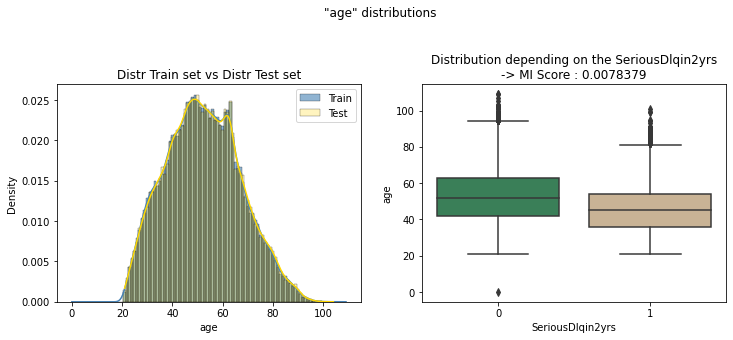

In [16]:
plot_distributions_discrete('age')

从图中可以发现
- 训练集和测试集的年龄分布基本类似（蓝色是训练集，黄色是测试集，在图上叠加起来显示绿色）
- 有严重违约情况的人群年龄整体偏低
- 年龄整体符合正态分布

处理age，根据法律，20岁以上才可以办理信用卡，所以20岁以下可以认为是错误数据，看看数量

In [17]:
data_train[data_train["age"]<20]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


发现只有一个案例，直接删除即可

In [18]:
data_train = data_train[data_train["age"]>=20]

### 2.3.2 DebtRatio

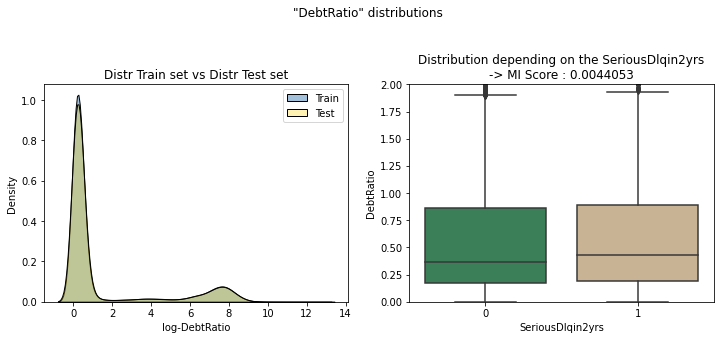

In [19]:
plot_distributions_continuous('DebtRatio')
plt.gca().set_ylim(0, 2);

- 负债率正常来讲不会太高，主要集中在1附近（左图中取了对数，也就是0附近）
- 考虑根据左图将取对数后大于9的离群点进行处理

In [20]:
print(data_train[data_train["DebtRatio"]>np.e**9].shape[0])

323


占比较小，直接删去即可

In [21]:
data_train = data_train[data_train["DebtRatio"]<=np.e**9]
#看看操作是否成功
data_train.shape[0]

149676

### 2.3.3 MonthlyIncome
做类似分析和处理

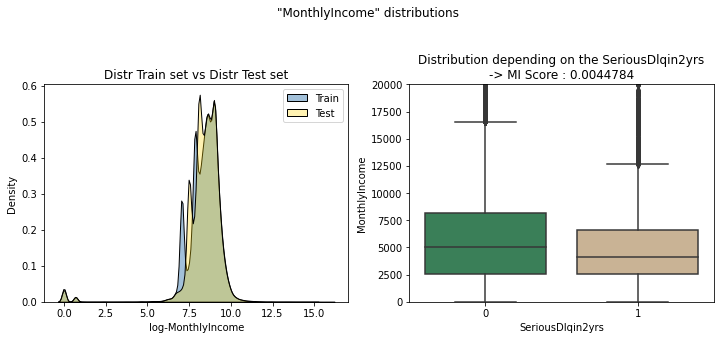

In [22]:
plot_distributions_continuous('MonthlyIncome')
plt.gca().set_ylim(0, 2e4);

In [23]:
data_train[data_train["MonthlyIncome"]>np.e**11.5].shape[0]

77

In [24]:
data_train = data_train[data_train["MonthlyIncome"]<np.e**11.5]
#看看操作是否成功
data_train.shape[0]

149599

### 2.3.4 NumberOfDependents

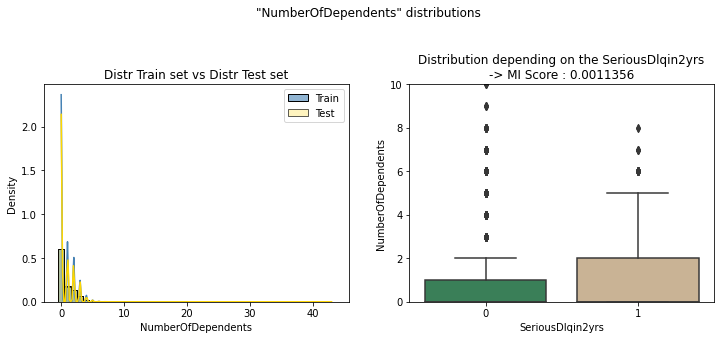

In [25]:
plot_distributions_discrete('NumberOfDependents')
plt.gca().set_ylim(0, 10);

In [26]:
data_train[data_train["NumberOfDependents"]>10].shape[0]

2

In [27]:
data_train = data_train[data_train["NumberOfDependents"]<=10]
#看看操作是否成功
data_train.shape[0]

149597

### 2.3.5  RevolvingUtilizationOfUnsecuredLines

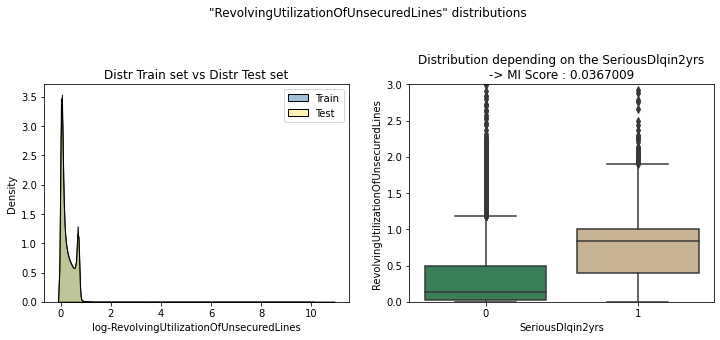

In [28]:
plot_distributions_continuous('RevolvingUtilizationOfUnsecuredLines')
plt.gca().set_ylim(0, 3);

In [29]:
data_train[data_train["RevolvingUtilizationOfUnsecuredLines"]>1.5].shape[0]

599

In [30]:
data_train = data_train[data_train["RevolvingUtilizationOfUnsecuredLines"]<=1.5]
data_train.shape[0]

148998

### 2.3.6 Pastdue
因为三者的含义类似，所以放在一起分析

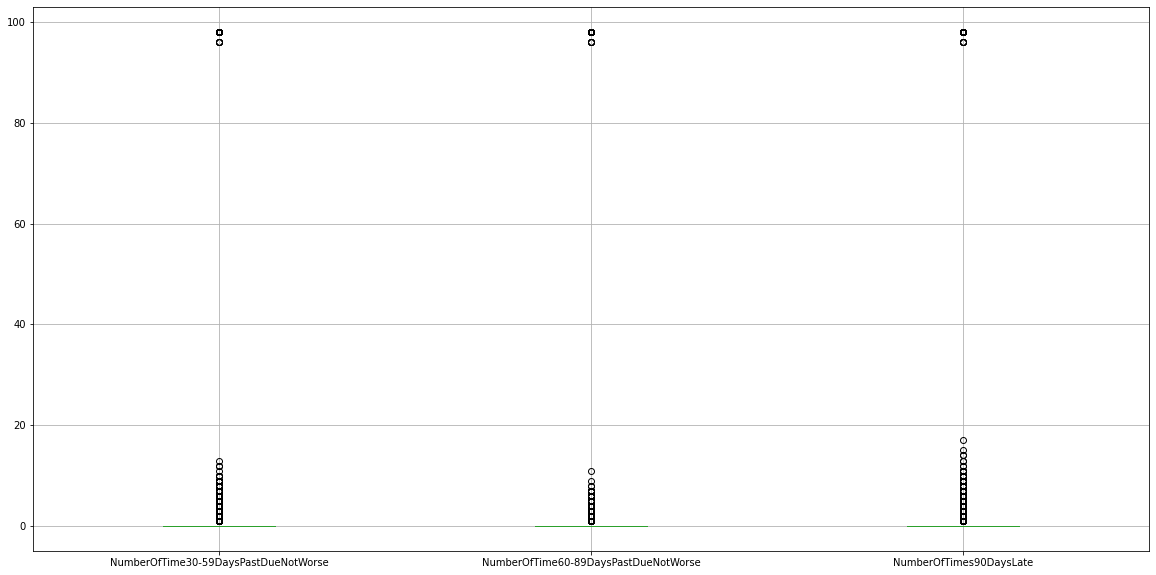

In [31]:
# 查看一下三者的箱型图
plt.figure(figsize=(20, 10)) 
data_train[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()

发现离群点都是类似的，可以将他们一起删除

In [32]:
data_train = data_train[data_train['NumberOfTime30-59DaysPastDueNotWorse']<95]
data_train.shape[0]

148729

### 2.3.6 NumberOfOpenCreditLinesAndLoans

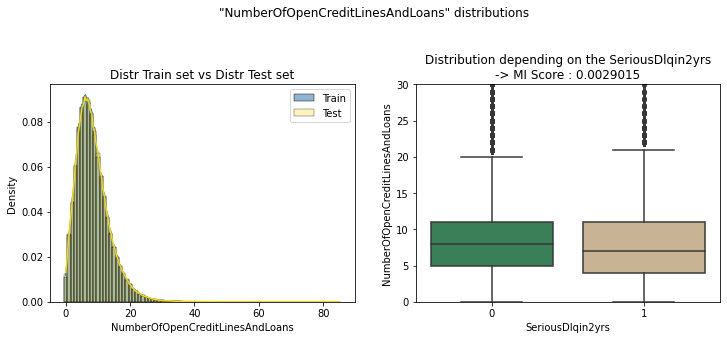

In [33]:
plot_distributions_discrete('NumberOfOpenCreditLinesAndLoans')
plt.gca().set_ylim(0, 30);

In [34]:
data_train = data_train[data_train['NumberOfOpenCreditLinesAndLoans']<20]
data_train.shape[0]

143646

## 2.4  查看处理后的结果

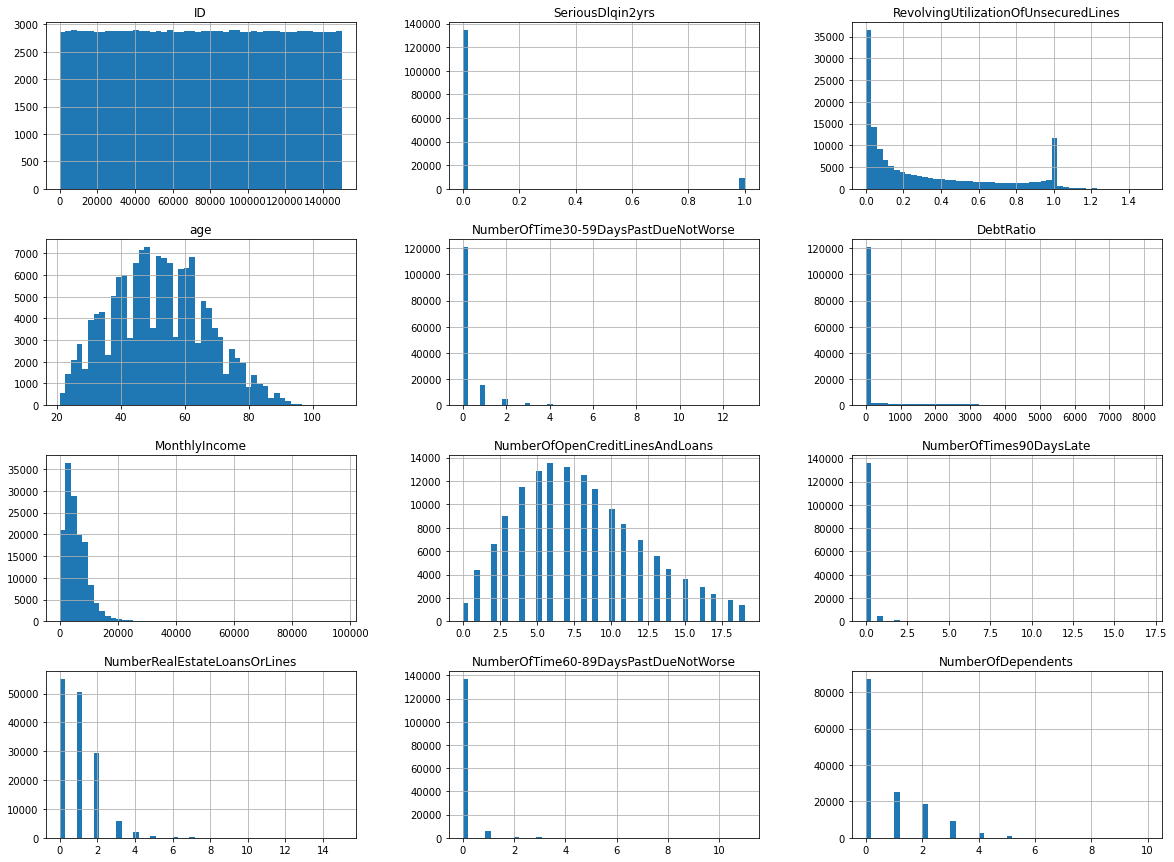

In [35]:
#大致数据分布情况
data_train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

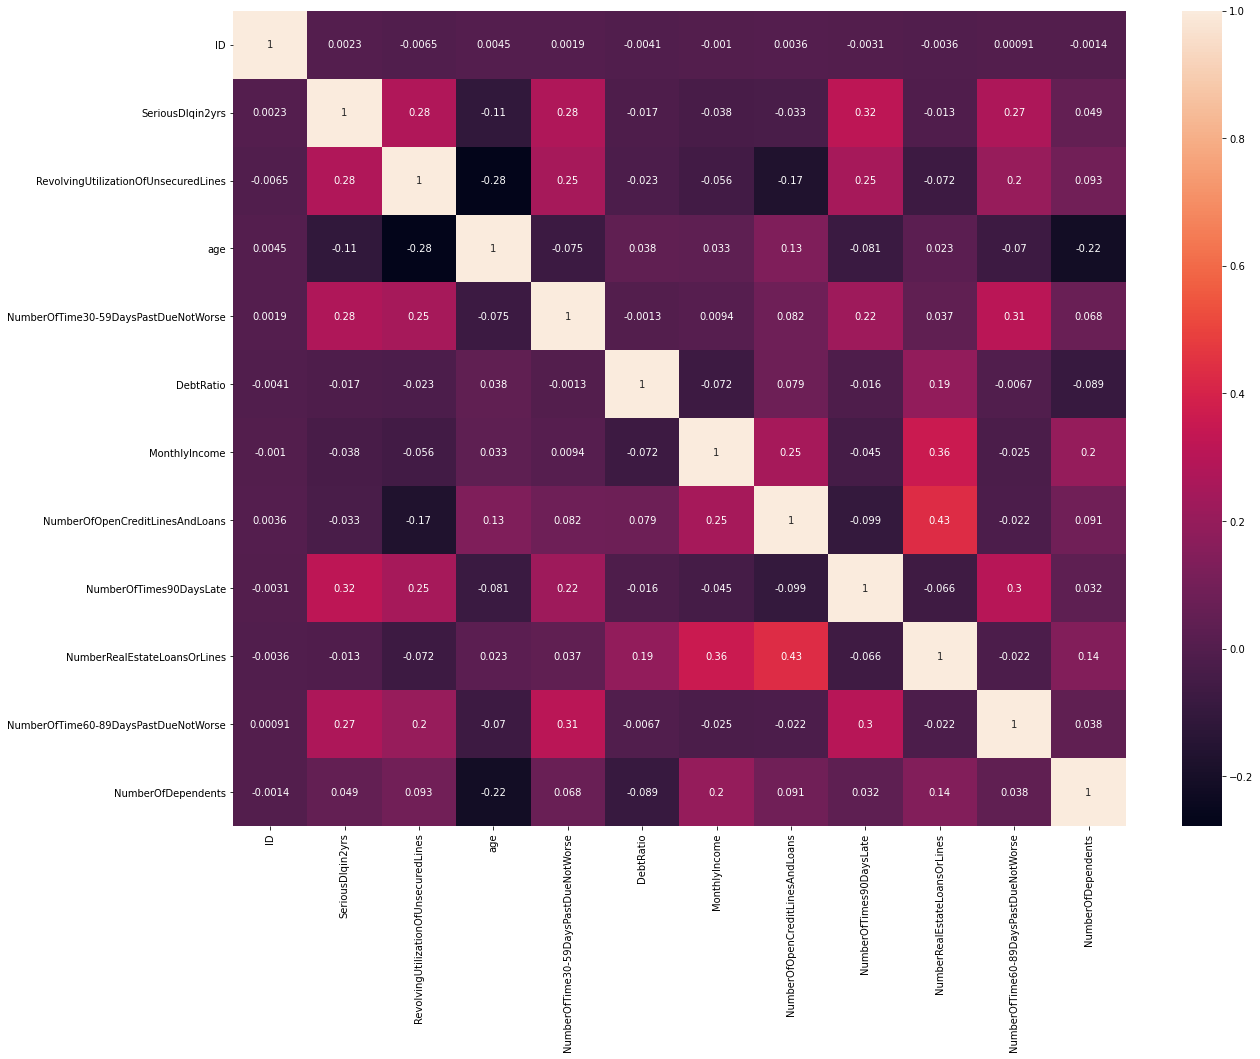

In [36]:
# 检查数据的相关性
corr = data_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

从相关系数图中可以看出因变量SeriousDlqin2yrs与
- RevolvingUtilizationOfUnsecuredLines
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfTime90Dayslate  
相关性较强

# 三.**变量处理**

为了方便后续处理，先将训练集，测试集上的自变量因变量划分清楚

In [37]:
X_train = data_train.iloc[:,2:]
Y_train = data_train.iloc[:,1]
X_test = data_test.iloc[:,2:]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    101503 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


## 3.1变量分箱
分箱离散化后,可以降低异常值的影响，在分箱后，我们还计算了Woe和IV  

- Woe全称叫Weight of Evidence，常用在风险评估、授信评分卡等领域。

- IV全称是Information value，可通过woe加权求和得到，衡量自变量对应变量的预测能力。

### 3.1.1最优分箱
对于连续变量直接使用最优分箱方法即可

In [38]:
import scipy.stats as stats

def monoto_bin(Y, X, n):
    r = 0
    total_good = Y.sum()
    total_bad =Y.count()-total_good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    
    #好坏比，求woe,证据权重
    d3['goodattr']=d3[Y.name]/total_good
    d3['badattr']=(d3['total']-d3[Y.name])/total_bad
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    
    #信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    print (d4)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [39]:
x1_d,x1_iv,x1_cut,x1_woe = monoto_bin(Y_train,X_train.RevolvingUtilizationOfUnsecuredLines,10)
x2_d,x2_iv,x2_cut,x2_woe = monoto_bin(Y_train,X_train.age,10)
x4_d,x4_iv,x4_cut,x4_woe = monoto_bin(Y_train,X_train.DebtRatio,10)
x5_d,x5_iv,x5_cut,x5_woe = monoto_bin(Y_train,X_train.MonthlyIncome,10)
#此处下标数对应的是第几个特征（例如x2的下标2对应他是第二个特征age）

   min_RevolvingUtilizationOfUnsecuredLines  \
0                                  0.000000   
1                                  0.029086   
2                                  0.150445   
3                                  0.556082   

   max_RevolvingUtilizationOfUnsecuredLines  SeriousDlqin2yrs  total  \
0                                  0.029085               652  35912   
1                                  0.150437               677  35911   
2                                  0.556042              1751  35911   
3                                  1.499474              6243  35912   

   goodattr   badattr       woe  
0  0.069935  0.262502 -1.322697  
1  0.072616  0.262308 -1.284333  
2  0.187815  0.254312 -0.303105  
3  0.669634  0.220878  1.109121  
   min_age  max_age  SeriousDlqin2yrs  total  goodattr   badattr       woe
0       21       33              1825  16702  0.195752  0.110755  0.569526
1       34       40              1608  17612  0.172477  0.119146  0.369915
2       

对于不能直接最优分箱的，我们手动设置边界进行分箱，先定义一个分箱函数

In [40]:
def fenxiang(X,Y,CUT):
    #先利用pandas的cut函数给包含自变量-因变量的dataframe加上Bucket特征
    
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,CUT)})
    
    #再利用groupby按Bucket将原有的dataframe按Bucket特征划分成子dataframe
    
    d2=d1.groupby('Bucket', as_index = True)
    
    #创建一个空的dataframe，往里面输入参数
    d3 = pd.DataFrame({"min":d2.min().X})
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y

    ## 计算woe iv
    good=Y.sum()
    bad=Y.count()-good
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by='min'))
    print("=" * 60)
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv,woe

再对剩余变量进行分箱

In [41]:
##先指定不同变量的cut
cutx3 = [-np.inf, 0, 1, 2, 4, 8, np.inf]
cutx6 = [-np.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, np.inf]
cutx7 = [-np.inf, 0, 1, 2, 4, 8, np.inf]
cutx8 = [-np.inf, 0, 1, 2, 3, 4, 5, np.inf]
cutx9 = [-np.inf, 0, 1, 2, 4, 8, np.inf]
cutx10 = [-np.inf, 0, 1, 2, 3, 4, 5, 6, np.inf]

In [42]:
##调用函数计算
x3_d,x3_iv,x3_woe = fenxiang(X_train["NumberOfTime30-59DaysPastDueNotWorse"],Y_train,cutx3)
x6_d,x6_iv,x6_woe = fenxiang(X_train["NumberOfOpenCreditLinesAndLoans"],Y_train,cutx6)
x7_d,x7_iv,x7_woe = fenxiang(X_train["NumberOfTimes90DaysLate"],Y_train,cutx7)
x8_d,x8_iv,x8_woe = fenxiang(X_train["NumberOfOpenCreditLinesAndLoans"],Y_train,cutx8)
x9_d,x9_iv,x9_woe = fenxiang(X_train["NumberOfTime60-89DaysPastDueNotWorse"],Y_train,cutx9)
x10_d,x10_iv,x10_woe = fenxiang(X_train["NumberOfDependents"],Y_train,cutx10)

             min  max   sum   total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  4780  121301  0.039406 -0.525868       0.512711   
(0.0, 1.0]     1    1  2265   15151  0.149495  0.929196       0.242948   
(1.0, 2.0]     2    2  1149    4319  0.266034  1.652923       0.123244   
(2.0, 4.0]     3    4   876    2351  0.372607  2.146716       0.093961   
(4.0, 8.0]     5    8   245     509  0.481336  2.593072       0.026279   
(8.0, inf]     9   13     8      15  0.533333  2.801294       0.000858   

             badattribute  
Bucket                     
(-inf, 0.0]      0.867469  
(0.0, 1.0]       0.095933  
(1.0, 2.0]       0.023600  
(2.0, 4.0]       0.010981  
(4.0, 8.0]       0.001965  
(8.0, inf]       0.000052  
              min  max  sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 0.0]     0    0  337   1613  0

### 3.2选取变量
查看各个变量的IV值

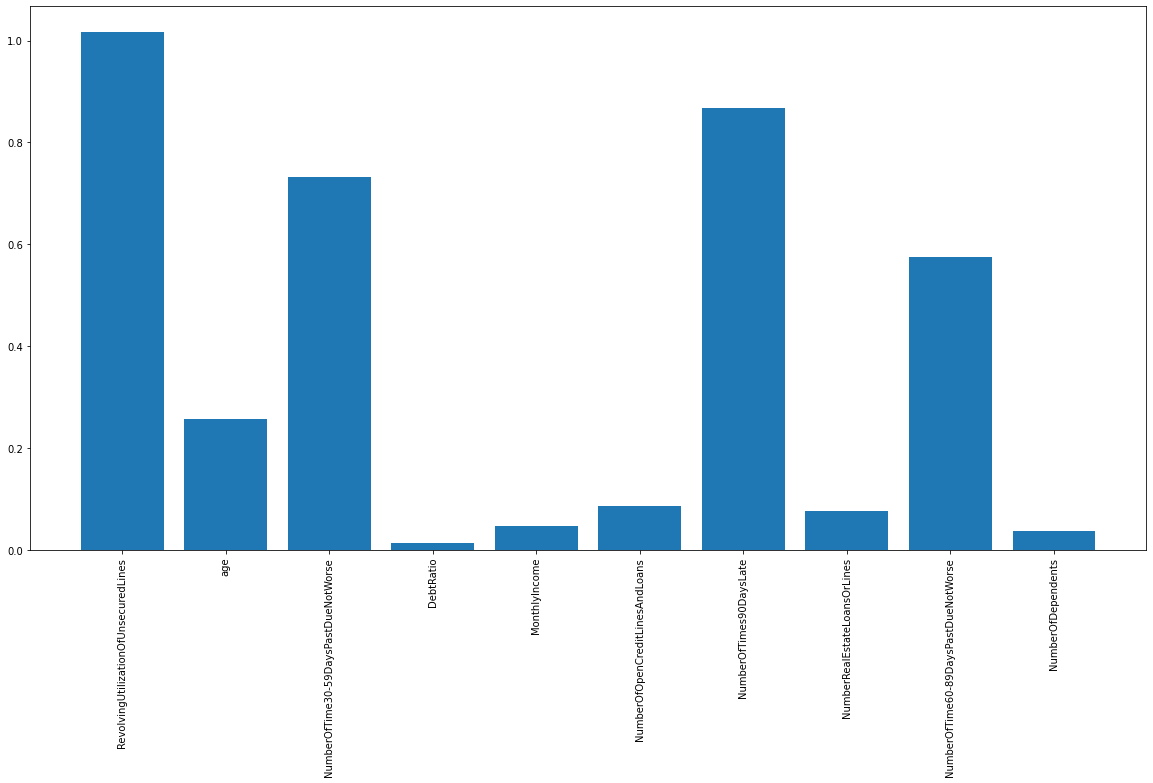

In [43]:
# 查看各个变量的IV值
informationValue = []
informationValue.append(x1_iv)
informationValue.append(x2_iv)
informationValue.append(x3_iv)
informationValue.append(x4_iv)
informationValue.append(x5_iv)
informationValue.append(x6_iv)
informationValue.append(x7_iv)
informationValue.append(x8_iv)
informationValue.append(x9_iv)
informationValue.append(x10_iv)
informationValue
plt.figure(figsize=(20, 10)) 
index=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
index_num = range(len(index))
ax=plt.bar(index_num,informationValue,tick_label=index)
plt.xticks(rotation=90) 
plt.show()

IV值可以用来衡量自变量对于因变量的响应能力，具体量化指标如下：
- $\leq$0.02:useless for prediction
- 0.02 to 0.1:Weak predictor
- 0.1 to 0.3Medium predictor
- 0.3 to 0.5Strong predictor 
- $\geq$0.5 Suspicious or too good to be true  
舍弃掉衡量能力较差的特征



In [44]:
X_train_last = X_train.drop(["NumberOfDependents"],axis = 1)
X_test_last = X_test.drop(["NumberOfDependents"],axis = 1)
X_test_last.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0.885519,43,0,0.177513,5700.0,4,0,0,0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0


# **四.模型预测**

为了评价模型以及后续调参，我们先定义一个ROC曲线绘制函数

In [45]:
# ROC曲线绘制
def draw_roc(FPR, TPR, label=None):
    plt.figure(figsize=(8,6))
    plt.plot(FPR, TPR,'b', linewidth=2, label=label)
    plt.plot([0,1],[0,1], "r--") 
    plt.xlim([0, 1])   
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

In [46]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## 4.1 RandomForest

RF在训练集上的AUC是: 86.14047%


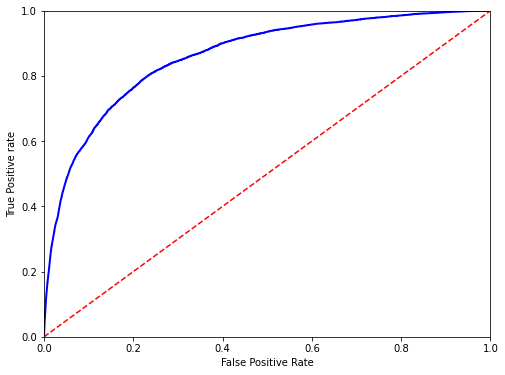

In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=300, max_depth=5, class_weight='balanced')
forest.fit(X_train_last, Y_train)
forest_scores_proba = forest.predict_proba(X_train_last)
forest_scores = forest_scores_proba[:,1]
FPR_forest, TPR_forest, THRESH_forest = roc_curve(Y_train, forest_scores)
AUC_forest=roc_auc_score(Y_train,forest_scores)
draw_roc(FPR_forest, TPR_forest)
print("RF在训练集上的AUC是: {:.5f}%".format(AUC_forest*100))

再通过交叉验证来检验模型的泛化能力  
取$K—Fold$中的$K=10$

In [48]:
AUC_forest_cv = cross_val_score(forest, X_train, Y_train, cv=10, scoring='roc_auc').mean()
print("RF在训练集上cv的AUC是：{:.5f}%".format(AUC_forest_cv*100))

RF在训练集上cv的AUC是：85.85262%


## 4.2梯度提升

GBC在训练集上的AUC是: 86.77951%


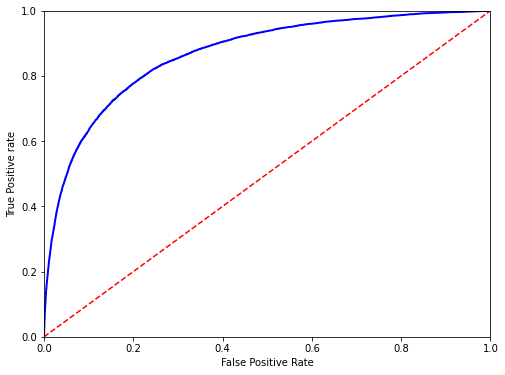

In [49]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_last, Y_train)
GBC_scores_proba =GBC.predict_proba(X_train_last)
GBC_scores = GBC_scores_proba[:,1]
FPR_GBC, TPR_GBC, THRESH_GBC = roc_curve(Y_train, GBC_scores)
AUC_GBC=roc_auc_score(Y_train,GBC_scores)
draw_roc(FPR_GBC, TPR_GBC)
print("GBC在训练集上的AUC是: {:.5f}%".format(AUC_GBC*100))

同样通过交叉验证来检验模型的泛化能力  
取$K—Fold$中的$K=10$

In [50]:
AUC_GBC_cv = cross_val_score(GBC, X_train, Y_train, cv=10, scoring='roc_auc').mean()
print("GBC在训练集上cv的AUC是：{:.5f}%".format(AUC_GBC_cv*100))

GBC在训练集上cv的AUC是：86.36800%


发现在两种方法中，**梯度上升**比随机森林的效果要好  
下面对梯度上升中的参数进行调参

# **五.参数调优**

## 5.1  **n_estimators**调优  

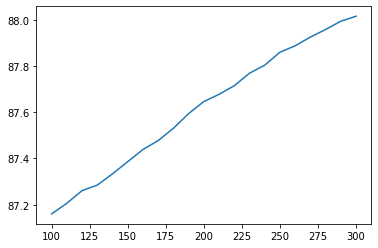

In [51]:
estimators=np.linspace(100,300,21).astype(int)
AUCs=[]
nums=[]
for estimator in estimators:
    GBC = GradientBoostingClassifier(n_estimators=estimator, learning_rate=0.1 ,max_depth=4)
    GBC.fit(X_train_last, Y_train)
    GBC_scores_proba =GBC.predict_proba(X_train_last)
    GBC_scores = GBC_scores_proba[:,1]
    FPR_GBC, TPR_GBC, THRESH_GBC = roc_curve(Y_train, GBC_scores)
    AUC_GBC=roc_auc_score(Y_train,GBC_scores)
    AUCs.append(AUC_GBC*100)
    nums.append(estimator)
plt.plot(nums,AUCs)

可以发现增长越来越缓慢，为了防止过拟合，我们就选取n=250

 ## 5.2 max_depth调优

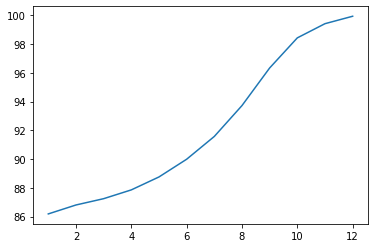

In [52]:
depths = np.linspace(1,12,12).astype(int)
AUCs=[]
maxdepths=[]
for depth in depths:
    GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1 ,max_depth=depth)
    GBC.fit(X_train_last, Y_train)
    GBC_scores_proba =GBC.predict_proba(X_train_last)
    GBC_scores = GBC_scores_proba[:,1]
    FPR_GBC, TPR_GBC, THRESH_GBC = roc_curve(Y_train, GBC_scores)
    AUC_GBC=roc_auc_score(Y_train,GBC_scores)
    AUCs.append(AUC_GBC*100)
    maxdepths.append(depth)
plt.plot(maxdepths,AUCs)

发现提升还是蛮明显的，但后面显然有一些过拟合了....所以取maxdepths=5，看一下AUC

GBC在训练集上的AUC是: 88.75837%


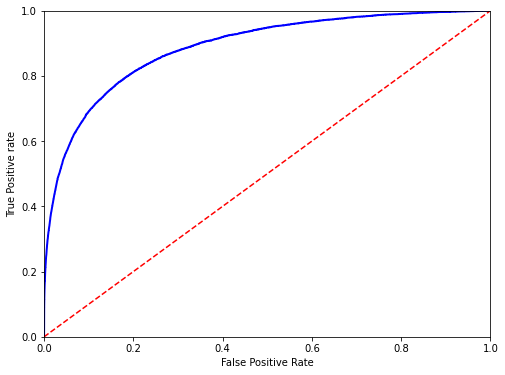

In [53]:
GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1 ,max_depth=5)
GBC.fit(X_train_last, Y_train)
GBC_scores_proba =GBC.predict_proba(X_train_last)
GBC_scores = GBC_scores_proba[:,1]
FPR_GBC, TPR_GBC, THRESH_GBC = roc_curve(Y_train, GBC_scores)
AUC_GBC=roc_auc_score(Y_train,GBC_scores)
draw_roc(FPR_GBC, TPR_GBC)
print("GBC在训练集上的AUC是: {:.5f}%".format(AUC_GBC*100))

还是有一些过拟合，降低一下learning_rate

GBC在训练集上的AUC是: 87.83538%


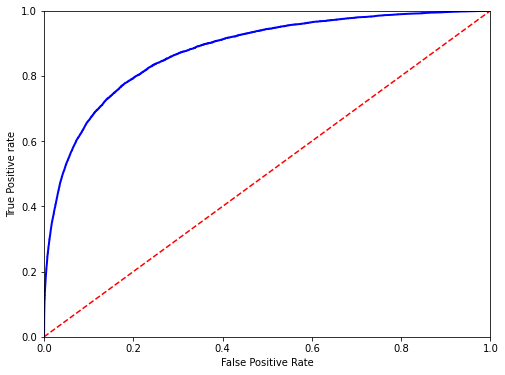

In [54]:
GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05 ,max_depth = 5)
GBC.fit(X_train_last, Y_train)
GBC_scores_proba =GBC.predict_proba(X_train_last)
GBC_scores = GBC_scores_proba[:,1]
FPR_GBC, TPR_GBC, THRESH_GBC = roc_curve(Y_train, GBC_scores)
AUC_GBC=roc_auc_score(Y_train,GBC_scores)
draw_roc(FPR_GBC, TPR_GBC)
print("GBC在训练集上的AUC是: {:.5f}%".format(AUC_GBC*100))

感觉还可以了 先交一下试试

# 六.提交结果

In [55]:
submission_proba = GBC.predict_proba(X_test_last)
submission_scores = submission_proba[:, 1]
submission_scores.shape

(101503,)

In [56]:
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission.csv', index=False)